In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#modul untuk ML
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor , plot_tree
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#model
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier,Perceptron,PassiveAggressiveClassifier,RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis


#imputer
from sklearn.impute import SimpleImputer, KNNImputer

#scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#encoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#binning
from sklearn.preprocessing import KBinsDiscretizer

#polynomial feature
from sklearn.preprocessing import PolynomialFeatures

#column transformer
from sklearn.compose import ColumnTransformer

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

#feature selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_regression, f_classif, RFE, SequentialFeatureSelector

#resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

#metric
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report, recall_score, precision_score,f1_score, RocCurveDisplay, PrecisionRecallDisplay,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',None)

## Data

In [41]:
df=pd.read_csv('bank_churn.csv').head(100)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [42]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       100 non-null    int64  
 1   credit_score      100 non-null    int64  
 2   country           100 non-null    object 
 3   gender            100 non-null    object 
 4   age               100 non-null    int64  
 5   tenure            100 non-null    int64  
 6   balance           100 non-null    float64
 7   products_number   100 non-null    int64  
 8   credit_card       100 non-null    int64  
 9   active_member     100 non-null    int64  
 10  estimated_salary  100 non-null    float64
 11  churn             100 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 9.5+ KB


In [44]:
df['churn'].value_counts(normalize=1)

churn
0    0.8
1    0.2
Name: proportion, dtype: float64

In [45]:
for i in df.columns:
    print(i)
    print(df[i].unique())

customer_id
[15634602 15647311 15619304 15701354 15737888 15574012 15592531 15656148
 15792365 15592389 15767821 15737173 15632264 15691483 15600882 15643966
 15737452 15788218 15661507 15568982 15577657 15597945 15699309 15725737
 15625047 15738191 15736816 15700772 15728693 15656300 15589475 15706552
 15750181 15659428 15732963 15794171 15788448 15729599 15717426 15585768
 15619360 15738148 15687946 15755196 15684171 15754849 15602280 15771573
 15766205 15771873 15616550 15768193 15683553 15702298 15569590 15760861
 15630053 15647091 15623944 15804771 15651280 15773469 15702014 15751208
 15592461 15789484 15696061 15641582 15638424 15755648 15703793 15620344
 15812518 15779052 15770811 15780961 15614049 15662085 15575185 15803136
 15706021 15663706 15641732 15701164 15738751 15805254 15762418 15625759
 15622897 15767954 15757535 15731511 15809248 15640635 15676966 15699461
 15738721 15693683 15604348 15633059]
credit_score
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 

In [46]:
df.select_dtypes(exclude='number').columns

Index(['country', 'gender'], dtype='object')

# Define Features & Target

In [47]:
#features
X=df[['credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary']]

#numeric -> robust, median imputer
#categoric -> one hot, mode imputer

#target
y=df['churn']

## Split Data

In [48]:
#split train & test
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) 


## Model Benchmarking

In [49]:
#define transformer

preprocessor=ColumnTransformer(
                    transformers=[
                    ('Numerical', Pipeline([('imputer',SimpleImputer(strategy='median')),('scaler',RobustScaler())]), ['credit_score', 'age', 'tenure', 'balance',  'estimated_salary']),
                    ('Categorical', Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(drop='first'))]), ['country', 'gender']), ],
remainder='passthrough') 

#resampler
ncr=NeighbourhoodCleaningRule()
smote=SMOTE(random_state=10)


#feature selection
select_kbest=SelectKBest(score_func=f_classif,k=10)

#model
logreg=LogisticRegression(random_state=10)
tree=DecisionTreeClassifier(random_state=10)
knn=KNeighborsClassifier()
voting_soft=VotingClassifier([('clf1',logreg),('clf2',tree),('clf3', knn)],voting='soft')
voting_hard=VotingClassifier([('clf1',logreg),('clf2',tree),('clf3', knn)],voting='hard')
stack=StackingClassifier([('clf1',logreg),('clf2',tree),('clf3', knn)],
                 final_estimator=tree #meta classifier
                        )
bagging=BaggingClassifier(tree,random_state=10)
rf=RandomForestClassifier(random_state=10)
ada=AdaBoostClassifier(random_state=10)
xgb=XGBClassifier(random_state=10)
lgbm=LGBMClassifier(random_state=10)
cat=CatBoostClassifier(random_state=10)
mlp=MLPClassifier(random_state=10)
nb=GaussianNB()
sgd=SGDClassifier(random_state=10)
sv=svm.SVC(random_state=10)
qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()
perceptron = Perceptron(random_state=10)
pac = PassiveAggressiveClassifier(random_state=10)
etc = ExtraTreesClassifier(random_state=10)
ridge = RidgeClassifier(random_state=10)
hgb = HistGradientBoostingClassifier(random_state=10)



#Create Pipeline
pipeline=ImbPipeline(steps=[
('preprocessor',preprocessor),
('feature_selection',select_kbest),   
('resampler',smote),   
('classifier',logreg)   
])

#prameter yang akan di tune

param_grid=[
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [logreg],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [tree],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [knn],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [voting_hard],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [voting_soft],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [stack],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [bagging],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [rf],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [ada],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [xgb],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [lgbm],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [cat],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [mlp],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [nb],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [sv],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [sgd],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [qda],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [lda],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [perceptron],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [pac],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [etc],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [ridge],
    }, 
    {'feature_selection__k':[10,13],
     'resampler' :[ncr,smote],
     'classifier' : [hgb],
    }

]


#Hyperparam tuning with GSCV
gscv=GridSearchCV(pipeline, param_grid,cv=3,n_jobs=-1,scoring='f1',
    return_train_score=True)

import time

#create start time
start_time=time.time()

#fit model
gscv.fit(X_train,y_train)

#create end time
end_time=time.time()

fitting_time=end_time-start_time

print(f"fitting time : {fitting_time:.2f} second")



Learning rate set to 0.002688
0:	learn: 0.6910435	total: 59.2ms	remaining: 59.2s
1:	learn: 0.6888919	total: 59.7ms	remaining: 29.8s
2:	learn: 0.6873544	total: 60ms	remaining: 19.9s
3:	learn: 0.6849002	total: 60.3ms	remaining: 15s
4:	learn: 0.6823352	total: 62.8ms	remaining: 12.5s
5:	learn: 0.6807456	total: 63.4ms	remaining: 10.5s
6:	learn: 0.6791253	total: 63.8ms	remaining: 9.04s
7:	learn: 0.6770468	total: 64ms	remaining: 7.94s
8:	learn: 0.6747696	total: 65.4ms	remaining: 7.2s
9:	learn: 0.6724661	total: 66.5ms	remaining: 6.58s
10:	learn: 0.6705979	total: 67.6ms	remaining: 6.08s
11:	learn: 0.6682787	total: 68.3ms	remaining: 5.62s
12:	learn: 0.6660766	total: 69.3ms	remaining: 5.26s
13:	learn: 0.6643479	total: 69.6ms	remaining: 4.9s
14:	learn: 0.6619396	total: 69.9ms	remaining: 4.59s
15:	learn: 0.6602610	total: 70.2ms	remaining: 4.32s
16:	learn: 0.6588085	total: 70.5ms	remaining: 4.08s
17:	learn: 0.6569535	total: 70.8ms	remaining: 3.86s
18:	learn: 0.6553906	total: 71.2ms	remaining: 3.67s


Learning rate set to 0.003614
0:	learn: 0.6902766	total: 61.9ms	remaining: 1m 1s
1:	learn: 0.6867837	total: 62.9ms	remaining: 31.4s
2:	learn: 0.6831547	total: 63.5ms	remaining: 21.1s
3:	learn: 0.6802485	total: 63.9ms	remaining: 15.9s
4:	learn: 0.6772455	total: 64.3ms	remaining: 12.8s
5:	learn: 0.6740695	total: 64.9ms	remaining: 10.8s
6:	learn: 0.6706252	total: 66.2ms	remaining: 9.39s
7:	learn: 0.6672341	total: 67.1ms	remaining: 8.32s
8:	learn: 0.6645990	total: 67.5ms	remaining: 7.43s
9:	learn: 0.6619258	total: 68.2ms	remaining: 6.75s
10:	learn: 0.6590963	total: 68.7ms	remaining: 6.18s
11:	learn: 0.6569871	total: 69.1ms	remaining: 5.69s
12:	learn: 0.6539356	total: 70ms	remaining: 5.32s
13:	learn: 0.6513752	total: 70.7ms	remaining: 4.98s
14:	learn: 0.6485224	total: 71.7ms	remaining: 4.71s
15:	learn: 0.6455659	total: 74ms	remaining: 4.55s
16:	learn: 0.6430262	total: 77.9ms	remaining: 4.5s
17:	learn: 0.6407047	total: 81.3ms	remaining: 4.43s
18:	learn: 0.6379695	total: 82.2ms	remaining: 4.2

253:	learn: 0.3812604	total: 150ms	remaining: 441ms
254:	learn: 0.3806192	total: 150ms	remaining: 439ms
255:	learn: 0.3803023	total: 151ms	remaining: 437ms
256:	learn: 0.3793253	total: 151ms	remaining: 436ms
257:	learn: 0.3784855	total: 151ms	remaining: 435ms
258:	learn: 0.3775553	total: 152ms	remaining: 434ms
259:	learn: 0.3767179	total: 152ms	remaining: 432ms
260:	learn: 0.3764148	total: 152ms	remaining: 431ms
261:	learn: 0.3757928	total: 154ms	remaining: 433ms
262:	learn: 0.3751660	total: 155ms	remaining: 433ms
263:	learn: 0.3741531	total: 155ms	remaining: 433ms
264:	learn: 0.3736126	total: 155ms	remaining: 431ms
265:	learn: 0.3729346	total: 157ms	remaining: 432ms
266:	learn: 0.3720131	total: 158ms	remaining: 433ms
267:	learn: 0.3714922	total: 158ms	remaining: 432ms
268:	learn: 0.3707532	total: 158ms	remaining: 431ms
269:	learn: 0.3700053	total: 159ms	remaining: 429ms
270:	learn: 0.3692137	total: 159ms	remaining: 428ms
271:	learn: 0.3683716	total: 160ms	remaining: 429ms
272:	learn: 

256:	learn: 0.2543611	total: 191ms	remaining: 553ms
257:	learn: 0.2536381	total: 192ms	remaining: 552ms
258:	learn: 0.2528670	total: 192ms	remaining: 550ms
259:	learn: 0.2518728	total: 193ms	remaining: 548ms
260:	learn: 0.2512182	total: 193ms	remaining: 547ms
261:	learn: 0.2503657	total: 194ms	remaining: 545ms
262:	learn: 0.2497546	total: 194ms	remaining: 545ms
263:	learn: 0.2489616	total: 195ms	remaining: 544ms
264:	learn: 0.2482928	total: 196ms	remaining: 542ms
265:	learn: 0.2478125	total: 196ms	remaining: 540ms
266:	learn: 0.2471555	total: 196ms	remaining: 539ms
267:	learn: 0.2461640	total: 197ms	remaining: 537ms
268:	learn: 0.2453208	total: 198ms	remaining: 539ms
269:	learn: 0.2448207	total: 199ms	remaining: 538ms
270:	learn: 0.2441514	total: 201ms	remaining: 541ms
271:	learn: 0.2434865	total: 201ms	remaining: 539ms
272:	learn: 0.2426260	total: 202ms	remaining: 537ms
273:	learn: 0.2419987	total: 203ms	remaining: 537ms
274:	learn: 0.2412113	total: 204ms	remaining: 537ms
275:	learn: 

505:	learn: 0.1901225	total: 217ms	remaining: 212ms
506:	learn: 0.1898609	total: 218ms	remaining: 212ms
507:	learn: 0.1894516	total: 221ms	remaining: 214ms
508:	learn: 0.1889523	total: 221ms	remaining: 214ms
509:	learn: 0.1885847	total: 222ms	remaining: 213ms
510:	learn: 0.1882157	total: 222ms	remaining: 212ms
511:	learn: 0.1877598	total: 222ms	remaining: 212ms
512:	learn: 0.1873886	total: 223ms	remaining: 211ms
513:	learn: 0.1869367	total: 223ms	remaining: 211ms
514:	learn: 0.1866403	total: 223ms	remaining: 210ms
515:	learn: 0.1862926	total: 223ms	remaining: 210ms
516:	learn: 0.1859948	total: 224ms	remaining: 209ms
517:	learn: 0.1856200	total: 224ms	remaining: 208ms
518:	learn: 0.1852779	total: 224ms	remaining: 208ms
519:	learn: 0.1849318	total: 225ms	remaining: 207ms
520:	learn: 0.1846658	total: 225ms	remaining: 207ms
521:	learn: 0.1843305	total: 225ms	remaining: 206ms
522:	learn: 0.1840958	total: 225ms	remaining: 206ms
523:	learn: 0.1837743	total: 226ms	remaining: 205ms
524:	learn: 

508:	learn: 0.2190654	total: 215ms	remaining: 208ms
509:	learn: 0.2187300	total: 216ms	remaining: 207ms
510:	learn: 0.2183429	total: 216ms	remaining: 207ms
511:	learn: 0.2179694	total: 216ms	remaining: 206ms
512:	learn: 0.2177159	total: 217ms	remaining: 206ms
513:	learn: 0.2173530	total: 217ms	remaining: 205ms
514:	learn: 0.2171280	total: 217ms	remaining: 205ms
515:	learn: 0.2167956	total: 218ms	remaining: 204ms
516:	learn: 0.2163858	total: 218ms	remaining: 204ms
517:	learn: 0.2158773	total: 218ms	remaining: 203ms
518:	learn: 0.2155210	total: 219ms	remaining: 203ms
519:	learn: 0.2150457	total: 219ms	remaining: 202ms
520:	learn: 0.2147540	total: 219ms	remaining: 202ms
521:	learn: 0.2141523	total: 220ms	remaining: 202ms
522:	learn: 0.2135149	total: 222ms	remaining: 202ms
523:	learn: 0.2129145	total: 222ms	remaining: 202ms
524:	learn: 0.2126005	total: 222ms	remaining: 201ms
525:	learn: 0.2122819	total: 223ms	remaining: 201ms
526:	learn: 0.2119443	total: 223ms	remaining: 200ms
527:	learn: 

fitting time : 9.27 second


In [50]:
gscv.best_estimator_

,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numerical', ...), ('Categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
pd.set_option('display.max_rows', 220)
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')[['param_classifier','param_feature_selection__k','param_resampler', 'mean_train_score','std_train_score' ,'mean_test_score','std_test_score']].reset_index()

,index,param_classifier,param_feature_selection__k,param_resampler,mean_train_score,std_train_score,mean_test_score,std_test_score
0,82,ExtraTreesClassifier(random_state=10),13,NeighbourhoodCleaningRule(),0.888744,0.020199,0.688889,0.083148
1,80,ExtraTreesClassifier(random_state=10),10,NeighbourhoodCleaningRule(),0.864444,0.021999,0.620202,0.080454
2,83,ExtraTreesClassifier(random_state=10),13,SMOTE(random_state=10),1.000000,0.000000,0.620106,0.202534
3,81,ExtraTreesClassifier(random_state=10),10,SMOTE(random_state=10),1.000000,0.000000,0.620106,0.202534
4,39,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n feature_weights=None, gamma=None, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=None,\n n_jobs=None, num_parallel_tree=None, ...)",13,SMOTE(random_state=10),1.000000,0.000000,0.607504,0.128921
5,43,LGBMClassifier(random_state=10),13,SMOTE(random_state=10),1.000000,0.000000,0.601399,0.108935
6,28,RandomForestClassifier(random_state=10),10,NeighbourhoodCleaningRule(),0.902174,0.051325,0.598485,0.108733
7,38,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n feature_weights=None, gamma=None, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=None,\n n_jobs=None, num_parallel_tree=None, ...)",13,NeighbourhoodCleaningRule(),0.854793,0.028588,0.594517,0.052108
8,91,HistGradientBoostingClassifier(random_state=10),13,SMOTE(random_state=10),1.000000,0.000000,0.587179,0.151304
9,34,AdaBoostClassifier(random_state=10),13,NeighbourhoodCleaningRule(),0.868223,0.062892,0.570707,0.070345


## Model Terbaik
1. Catboost - NCR - KBest(10)


## Hyperparameter Tuning

In [52]:
# define transformer




#feature selection
select_kbest=SelectKBest(score_func=f_classif,k=10)

#model
cat=CatBoostClassifier(random_state=10)

#Create Pipeline
pipeline=ImbPipeline(steps=[
('preprocessor',preprocessor),
('feature_selection',select_kbest),   
('resampler',smote),   
('classifier',rf)   
])

#prameter yang akan di tune

param_grid=[


                {'feature_selection__k':[5,7,10],
     'resampler' :[ncr,smote],
     'classifier' : [cat],
     'classifier__max_depth' : [ 10,15],
     'classifier__n_estimators' :[100,150]
  
    }

]


#Hyperparam tuning with GSCV
gscv=GridSearchCV(pipeline, param_grid,cv=5,n_jobs=-1,scoring='f1',
    return_train_score=True)

import time

#create start time
start_time=time.time()

#fit model
gscv.fit(X_train,y_train)

#create end time
end_time=time.time()

fitting_time=end_time-start_time

print(f"fitting time : {fitting_time:.2f} second")



762:	learn: 0.0805928	total: 406ms	remaining: 126ms
763:	learn: 0.0804541	total: 407ms	remaining: 126ms
764:	learn: 0.0803213	total: 407ms	remaining: 125ms
765:	learn: 0.0801745	total: 408ms	remaining: 125ms
766:	learn: 0.0800492	total: 408ms	remaining: 124ms
767:	learn: 0.0798634	total: 408ms	remaining: 123ms
768:	learn: 0.0797147	total: 409ms	remaining: 123ms
769:	learn: 0.0795145	total: 409ms	remaining: 122ms
770:	learn: 0.0793865	total: 410ms	remaining: 122ms
771:	learn: 0.0792255	total: 410ms	remaining: 121ms
772:	learn: 0.0791226	total: 411ms	remaining: 121ms
773:	learn: 0.0789653	total: 411ms	remaining: 120ms
774:	learn: 0.0788262	total: 412ms	remaining: 120ms
775:	learn: 0.0786817	total: 412ms	remaining: 119ms
776:	learn: 0.0785531	total: 413ms	remaining: 118ms
777:	learn: 0.0784008	total: 413ms	remaining: 118ms
778:	learn: 0.0782611	total: 413ms	remaining: 117ms
779:	learn: 0.0781453	total: 414ms	remaining: 117ms
780:	learn: 0.0780527	total: 414ms	remaining: 116ms
781:	learn: 

[LightGBM] [Info] Number of positive: 11, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.255814 -> initscore=-1.067841
[LightGBM] [Info] Start training from score -1.067841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

761:	learn: 0.1595894	total: 362ms	remaining: 113ms
762:	learn: 0.1593317	total: 362ms	remaining: 113ms
763:	learn: 0.1590499	total: 363ms	remaining: 112ms
764:	learn: 0.1587588	total: 363ms	remaining: 111ms
765:	learn: 0.1585286	total: 363ms	remaining: 111ms
766:	learn: 0.1583920	total: 364ms	remaining: 110ms
767:	learn: 0.1581999	total: 364ms	remaining: 110ms
768:	learn: 0.1579739	total: 364ms	remaining: 109ms
769:	learn: 0.1577817	total: 364ms	remaining: 109ms
770:	learn: 0.1575980	total: 365ms	remaining: 108ms
771:	learn: 0.1573856	total: 365ms	remaining: 108ms
772:	learn: 0.1572024	total: 366ms	remaining: 107ms
773:	learn: 0.1570391	total: 366ms	remaining: 107ms
774:	learn: 0.1568044	total: 366ms	remaining: 106ms
775:	learn: 0.1565547	total: 367ms	remaining: 106ms
776:	learn: 0.1562918	total: 367ms	remaining: 105ms
777:	learn: 0.1561058	total: 367ms	remaining: 105ms
778:	learn: 0.1558170	total: 367ms	remaining: 104ms
779:	learn: 0.1555390	total: 368ms	remaining: 104ms
780:	learn: 

Learning rate set to 0.025043
0:	learn: 0.6855734	total: 60.9ms	remaining: 6.03s
1:	learn: 0.6783814	total: 61.2ms	remaining: 3s
2:	learn: 0.6698627	total: 61.3ms	remaining: 1.98s
3:	learn: 0.6646056	total: 61.6ms	remaining: 1.48s
4:	learn: 0.6583216	total: 61.7ms	remaining: 1.17s
5:	learn: 0.6521608	total: 61.9ms	remaining: 969ms
6:	learn: 0.6480028	total: 62.1ms	remaining: 825ms
7:	learn: 0.6441493	total: 62.3ms	remaining: 717ms
8:	learn: 0.6358214	total: 62.4ms	remaining: 630ms
9:	learn: 0.6322660	total: 62.5ms	remaining: 562ms
10:	learn: 0.6292861	total: 62.9ms	remaining: 509ms
11:	learn: 0.6227071	total: 63ms	remaining: 462ms
12:	learn: 0.6198423	total: 63.8ms	remaining: 427ms
13:	learn: 0.6142295	total: 64ms	remaining: 393ms
14:	learn: 0.6097269	total: 64.2ms	remaining: 364ms
15:	learn: 0.6032009	total: 64.3ms	remaining: 338ms
16:	learn: 0.5991195	total: 64.5ms	remaining: 315ms
17:	learn: 0.5954182	total: 64.7ms	remaining: 295ms
18:	learn: 0.5904381	total: 64.7ms	remaining: 276ms

[LightGBM] [Info] Number of positive: 11, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244444 -> initscore=-1.128465
[LightGBM] [Info] Start training from score -1.128465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

30:	learn: 0.5558343	total: 118ms	remaining: 262ms
31:	learn: 0.5518761	total: 124ms	remaining: 264ms
32:	learn: 0.5459631	total: 125ms	remaining: 253ms
33:	learn: 0.5429373	total: 126ms	remaining: 244ms
34:	learn: 0.5402686	total: 129ms	remaining: 239ms
35:	learn: 0.5368661	total: 134ms	remaining: 237ms
36:	learn: 0.5338959	total: 141ms	remaining: 239ms
37:	learn: 0.5310497	total: 144ms	remaining: 235ms
38:	learn: 0.5282562	total: 151ms	remaining: 236ms
39:	learn: 0.5250661	total: 155ms	remaining: 233ms
40:	learn: 0.5203867	total: 157ms	remaining: 227ms
41:	learn: 0.5173442	total: 162ms	remaining: 224ms
42:	learn: 0.5111802	total: 163ms	remaining: 216ms
43:	learn: 0.5069062	total: 170ms	remaining: 216ms
44:	learn: 0.5038443	total: 175ms	remaining: 213ms
45:	learn: 0.5010514	total: 178ms	remaining: 209ms
46:	learn: 0.4976723	total: 181ms	remaining: 204ms
47:	learn: 0.4946443	total: 184ms	remaining: 199ms
48:	learn: 0.4920060	total: 186ms	remaining: 194ms
49:	learn: 0.4898170	total: 189

12:	learn: 0.6701191	total: 46.5ms	remaining: 490ms
13:	learn: 0.6681360	total: 46.8ms	remaining: 455ms
14:	learn: 0.6666337	total: 47.8ms	remaining: 431ms
15:	learn: 0.6648533	total: 49.8ms	remaining: 417ms
16:	learn: 0.6634666	total: 52.7ms	remaining: 412ms
17:	learn: 0.6608178	total: 52.8ms	remaining: 387ms
18:	learn: 0.6592544	total: 56.9ms	remaining: 392ms
19:	learn: 0.6563707	total: 57.9ms	remaining: 376ms
20:	learn: 0.6545327	total: 67.1ms	remaining: 412ms
21:	learn: 0.6532113	total: 70.5ms	remaining: 410ms
22:	learn: 0.6519868	total: 74.2ms	remaining: 409ms
23:	learn: 0.6505321	total: 79ms	remaining: 415ms
24:	learn: 0.6485565	total: 81.8ms	remaining: 409ms
25:	learn: 0.6467154	total: 82.7ms	remaining: 394ms
26:	learn: 0.6453530	total: 85.1ms	remaining: 388ms
27:	learn: 0.6440403	total: 89.7ms	remaining: 391ms
28:	learn: 0.6426570	total: 94.5ms	remaining: 394ms
29:	learn: 0.6410073	total: 95.5ms	remaining: 382ms
30:	learn: 0.6388085	total: 96.1ms	remaining: 369ms
31:	learn: 0.6

Learning rate set to 0.023477
0:	learn: 0.6858286	total: 58.7ms	remaining: 5.81s
1:	learn: 0.6777526	total: 58.9ms	remaining: 2.89s
2:	learn: 0.6712962	total: 59ms	remaining: 1.91s
3:	learn: 0.6675034	total: 60.2ms	remaining: 1.45s
4:	learn: 0.6623143	total: 60.5ms	remaining: 1.15s
5:	learn: 0.6573966	total: 60.6ms	remaining: 950ms
6:	learn: 0.6510286	total: 60.8ms	remaining: 807ms
7:	learn: 0.6459950	total: 60.9ms	remaining: 701ms
8:	learn: 0.6402005	total: 61ms	remaining: 617ms
9:	learn: 0.6336355	total: 61ms	remaining: 549ms
10:	learn: 0.6273642	total: 61.3ms	remaining: 496ms
11:	learn: 0.6226694	total: 61.5ms	remaining: 451ms
12:	learn: 0.6187306	total: 61.7ms	remaining: 413ms
13:	learn: 0.6139790	total: 61.8ms	remaining: 380ms
14:	learn: 0.6090330	total: 62ms	remaining: 351ms
15:	learn: 0.6045184	total: 62.2ms	remaining: 326ms
16:	learn: 0.6007758	total: 62.4ms	remaining: 304ms
17:	learn: 0.5975395	total: 62.6ms	remaining: 285ms
18:	learn: 0.5924307	total: 62.7ms	remaining: 267ms


108:	learn: 0.3635287	total: 145ms	remaining: 54.4ms
109:	learn: 0.3620024	total: 145ms	remaining: 52.7ms
110:	learn: 0.3608034	total: 147ms	remaining: 51.8ms
111:	learn: 0.3588704	total: 148ms	remaining: 50.1ms
112:	learn: 0.3574841	total: 148ms	remaining: 48.5ms
113:	learn: 0.3556808	total: 148ms	remaining: 46.8ms
114:	learn: 0.3541700	total: 150ms	remaining: 45.7ms
115:	learn: 0.3528829	total: 152ms	remaining: 44.5ms
116:	learn: 0.3513628	total: 152ms	remaining: 42.9ms
117:	learn: 0.3498846	total: 153ms	remaining: 41.4ms
118:	learn: 0.3488197	total: 154ms	remaining: 40.2ms
119:	learn: 0.3471827	total: 155ms	remaining: 38.8ms
120:	learn: 0.3456622	total: 157ms	remaining: 37.7ms
121:	learn: 0.3445896	total: 161ms	remaining: 36.9ms
122:	learn: 0.3428924	total: 162ms	remaining: 35.5ms
123:	learn: 0.3415521	total: 162ms	remaining: 34ms
124:	learn: 0.3402267	total: 164ms	remaining: 32.8ms
125:	learn: 0.3389431	total: 164ms	remaining: 31.3ms
126:	learn: 0.3373514	total: 164ms	remaining: 29

Learning rate set to 0.025598
0:	learn: 0.6895198	total: 4.7ms	remaining: 465ms
1:	learn: 0.6835678	total: 5ms	remaining: 245ms
2:	learn: 0.6805103	total: 6.08ms	remaining: 197ms
3:	learn: 0.6750151	total: 7.64ms	remaining: 183ms
4:	learn: 0.6719777	total: 7.96ms	remaining: 151ms
5:	learn: 0.6653093	total: 8.06ms	remaining: 126ms
6:	learn: 0.6578935	total: 8.14ms	remaining: 108ms
7:	learn: 0.6532855	total: 8.76ms	remaining: 101ms
8:	learn: 0.6504173	total: 9.43ms	remaining: 95.3ms
9:	learn: 0.6459935	total: 9.69ms	remaining: 87.2ms
10:	learn: 0.6431629	total: 9.95ms	remaining: 80.5ms
11:	learn: 0.6374784	total: 10.1ms	remaining: 73.9ms
12:	learn: 0.6325256	total: 10.2ms	remaining: 68.3ms
13:	learn: 0.6295658	total: 10.7ms	remaining: 65.8ms
14:	learn: 0.6266656	total: 11.2ms	remaining: 63.6ms
15:	learn: 0.6216656	total: 11.4ms	remaining: 59.7ms
16:	learn: 0.6188348	total: 11.8ms	remaining: 57.8ms
17:	learn: 0.6142630	total: 12ms	remaining: 54.8ms
18:	learn: 0.6102018	total: 12.5ms	remai

In [53]:
gscv.best_estimator_

,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numerical', ...), ('Categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [54]:
pd.set_option('display.max_rows', 220)
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')[['param_classifier','param_feature_selection__k','param_resampler', 'mean_train_score','std_train_score' ,'mean_test_score','std_test_score']].reset_index()

,index,param_classifier,param_feature_selection__k,param_resampler,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0,<catboost.core.CatBoostClassifier object at 0x15af65c10>,5,NeighbourhoodCleaningRule(),0.826845,0.042567,0.637619,0.141905
1,18,<catboost.core.CatBoostClassifier object at 0x15af65c10>,5,NeighbourhoodCleaningRule(),0.821796,0.039229,0.637619,0.141905
2,6,<catboost.core.CatBoostClassifier object at 0x15af65c10>,5,NeighbourhoodCleaningRule(),0.819599,0.037455,0.637619,0.141905
3,12,<catboost.core.CatBoostClassifier object at 0x15af65c10>,5,NeighbourhoodCleaningRule(),0.813331,0.035030,0.618571,0.143114
4,23,<catboost.core.CatBoostClassifier object at 0x15af65c10>,10,SMOTE(random_state=10),0.992000,0.016000,0.611111,0.210819
5,5,<catboost.core.CatBoostClassifier object at 0x15af65c10>,10,SMOTE(random_state=10),0.970370,0.043192,0.546508,0.188495
6,9,<catboost.core.CatBoostClassifier object at 0x15af65c10>,7,SMOTE(random_state=10),0.927395,0.030866,0.546508,0.188495
7,17,<catboost.core.CatBoostClassifier object at 0x15af65c10>,10,SMOTE(random_state=10),0.984615,0.030769,0.539683,0.085184
8,11,<catboost.core.CatBoostClassifier object at 0x15af65c10>,10,SMOTE(random_state=10),0.977778,0.044444,0.532222,0.188771
9,15,<catboost.core.CatBoostClassifier object at 0x15af65c10>,7,SMOTE(random_state=10),0.948677,0.037473,0.518889,0.254481


In [55]:
gscv.best_params_

{'classifier': <catboost.core.CatBoostClassifier at 0x15af65c10>,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 100,
 'feature_selection__k': 5,
 'resampler': NeighbourhoodCleaningRule()}

## Feature Interpretation

In [59]:
# Extract the SelectKBest step
select_k_best = gscv.best_estimator_.named_steps['feature_selection']

# Extract the column transformer step
column_transformer = gscv.best_estimator_.named_steps['preprocessor']

# Get the feature names after one-hot encoding
num_feature_names= column_transformer.named_transformers_['Numerical'].get_feature_names_out(['credit_score', 'age', 'tenure', 'balance',  'estimated_salary'])

cat_feature_names = column_transformer.named_transformers_['Categorical'].get_feature_names_out(['country', 'gender'])

rem_feature_names=['products_number', 'credit_card', 'active_member']

feat_cols=list(num_feature_names)+list(cat_feature_names)+rem_feature_names

select_k_best.get_feature_names_out(feat_cols)


array(['age', 'tenure', 'gender_Male', 'credit_card', 'active_member'],
      dtype=object)

### Feature Importance

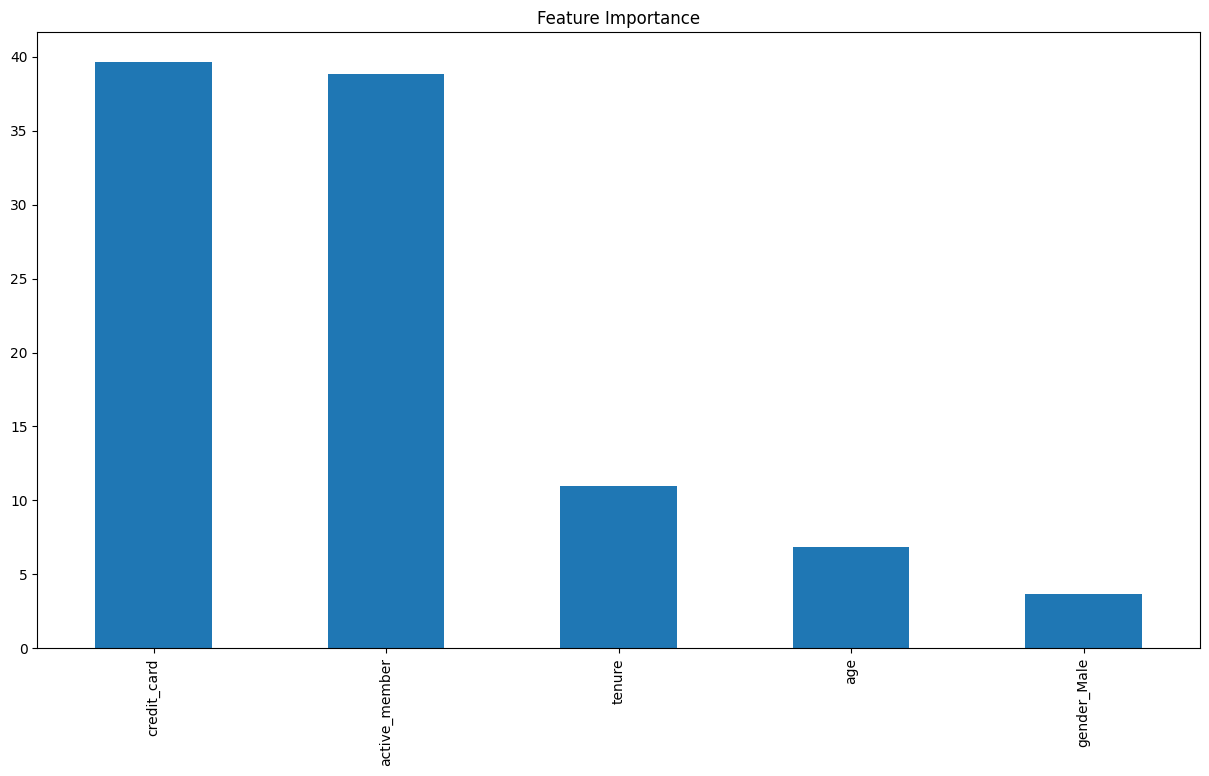

In [60]:
# Ambil model akhir (bisa LogisticRegression atau LGBMClassifier)
best_model = gscv.best_estimator_.named_steps['classifier']

# Ambil nama fitur setelah feature_selection
feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]

# Cek apakah model punya coef_ (Linear) atau feature_importances_ (Tree-based)
if hasattr(best_model, "coef_"):
    # Logistic Regression
    coefficients = np.abs(best_model.coef_).flatten()
    model_coef1 = pd.Series(coefficients, index=selected_feature_names).sort_values(ascending=False)
elif hasattr(best_model, "feature_importances_"):
    # LGBM / Tree-based models
    importances = best_model.feature_importances_
    model_coef1 = pd.Series(importances, index=selected_feature_names).sort_values(ascending=False)
else:
    raise ValueError("Model tidak punya coef_ atau feature_importances_")

# Plot
plt.figure(figsize=(15,8))
model_coef1.plot(kind='bar', title='Feature Importance')
plt.show()


### Shap Value

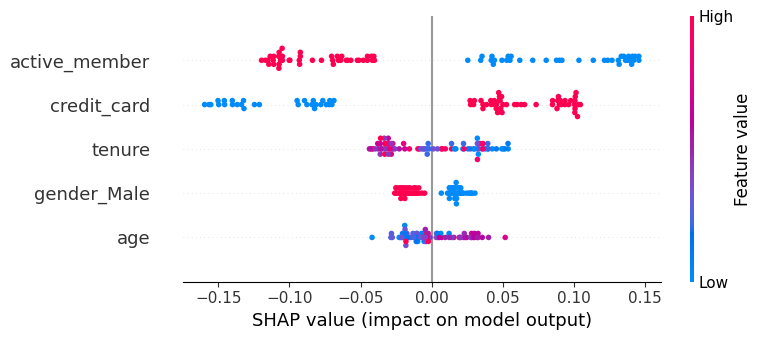

52:	learn: 0.5800756	total: 90.9ms	remaining: 166ms
53:	learn: 0.5787610	total: 91.2ms	remaining: 162ms
54:	learn: 0.5772898	total: 91.7ms	remaining: 158ms
55:	learn: 0.5751291	total: 91.8ms	remaining: 154ms
56:	learn: 0.5733508	total: 92.4ms	remaining: 151ms
57:	learn: 0.5720048	total: 93.6ms	remaining: 148ms
58:	learn: 0.5703289	total: 93.8ms	remaining: 145ms
59:	learn: 0.5692564	total: 94.8ms	remaining: 142ms
60:	learn: 0.5669022	total: 95ms	remaining: 139ms
61:	learn: 0.5652772	total: 95.3ms	remaining: 135ms
62:	learn: 0.5624106	total: 95.4ms	remaining: 132ms
63:	learn: 0.5612194	total: 96.4ms	remaining: 130ms
64:	learn: 0.5599215	total: 96.7ms	remaining: 127ms
65:	learn: 0.5571311	total: 96.8ms	remaining: 123ms
66:	learn: 0.5560298	total: 97.8ms	remaining: 121ms
67:	learn: 0.5547496	total: 98.8ms	remaining: 119ms
68:	learn: 0.5527798	total: 99ms	remaining: 116ms
69:	learn: 0.5516840	total: 99.5ms	remaining: 114ms
70:	learn: 0.5507428	total: 100ms	remaining: 112ms
71:	learn: 0.5478

50:	learn: 0.5342558	total: 495ms	remaining: 476ms
51:	learn: 0.5321234	total: 496ms	remaining: 458ms
52:	learn: 0.5300844	total: 497ms	remaining: 441ms
53:	learn: 0.5287135	total: 607ms	remaining: 517ms
54:	learn: 0.5249799	total: 613ms	remaining: 502ms
55:	learn: 0.5200635	total: 614ms	remaining: 482ms
56:	learn: 0.5182521	total: 647ms	remaining: 488ms
57:	learn: 0.5142355	total: 705ms	remaining: 511ms
58:	learn: 0.5094556	total: 706ms	remaining: 491ms
59:	learn: 0.5048377	total: 707ms	remaining: 471ms
60:	learn: 0.5006238	total: 708ms	remaining: 452ms
61:	learn: 0.4986745	total: 723ms	remaining: 443ms
62:	learn: 0.4964440	total: 743ms	remaining: 436ms
63:	learn: 0.4946255	total: 753ms	remaining: 424ms
64:	learn: 0.4914697	total: 754ms	remaining: 406ms
65:	learn: 0.4897974	total: 756ms	remaining: 390ms
66:	learn: 0.4844197	total: 756ms	remaining: 373ms
67:	learn: 0.4828030	total: 759ms	remaining: 357ms
68:	learn: 0.4790182	total: 760ms	remaining: 341ms
69:	learn: 0.4756671	total: 770

123:	learn: 0.4205470	total: 408ms	remaining: 86.3ms
124:	learn: 0.4193547	total: 408ms	remaining: 82.3ms
125:	learn: 0.4181927	total: 409ms	remaining: 78.4ms
126:	learn: 0.4169835	total: 410ms	remaining: 74.8ms
127:	learn: 0.4157842	total: 411ms	remaining: 71.2ms
128:	learn: 0.4137711	total: 412ms	remaining: 67.5ms
129:	learn: 0.4121366	total: 412ms	remaining: 63.9ms
130:	learn: 0.4099946	total: 412ms	remaining: 60.2ms
131:	learn: 0.4089881	total: 412ms	remaining: 56.6ms
132:	learn: 0.4079892	total: 420ms	remaining: 54ms
133:	learn: 0.4068182	total: 420ms	remaining: 50.5ms
134:	learn: 0.4059423	total: 420ms	remaining: 47ms
135:	learn: 0.4048232	total: 420ms	remaining: 43.6ms
136:	learn: 0.4041686	total: 423ms	remaining: 40.5ms
137:	learn: 0.4018550	total: 424ms	remaining: 37.1ms
138:	learn: 0.4010798	total: 424ms	remaining: 33.8ms
139:	learn: 0.4002680	total: 425ms	remaining: 30.6ms
140:	learn: 0.3984072	total: 425ms	remaining: 27.3ms
141:	learn: 0.3968257	total: 425ms	remaining: 24.1

103:	learn: 0.4284492	total: 286ms	remaining: 126ms
104:	learn: 0.4268792	total: 287ms	remaining: 123ms
105:	learn: 0.4253506	total: 288ms	remaining: 120ms
106:	learn: 0.4237168	total: 289ms	remaining: 116ms
107:	learn: 0.4225480	total: 292ms	remaining: 114ms
108:	learn: 0.4208096	total: 293ms	remaining: 110ms
109:	learn: 0.4194951	total: 294ms	remaining: 107ms
110:	learn: 0.4178343	total: 296ms	remaining: 104ms
111:	learn: 0.4164236	total: 300ms	remaining: 102ms
112:	learn: 0.4150703	total: 303ms	remaining: 99.1ms
113:	learn: 0.4138113	total: 305ms	remaining: 96.5ms
114:	learn: 0.4129209	total: 310ms	remaining: 94.5ms
115:	learn: 0.4112600	total: 311ms	remaining: 91.2ms
116:	learn: 0.4090558	total: 312ms	remaining: 87.9ms
117:	learn: 0.4077452	total: 313ms	remaining: 84.9ms
118:	learn: 0.4063853	total: 314ms	remaining: 81.7ms
119:	learn: 0.4053631	total: 315ms	remaining: 78.8ms
120:	learn: 0.4040098	total: 317ms	remaining: 75.9ms
121:	learn: 0.4026449	total: 327ms	remaining: 75ms
122:

94:	learn: 0.4600603	total: 660ms	remaining: 382ms
95:	learn: 0.4585391	total: 673ms	remaining: 379ms
96:	learn: 0.4565735	total: 677ms	remaining: 370ms
97:	learn: 0.4549686	total: 680ms	remaining: 361ms
98:	learn: 0.4530035	total: 684ms	remaining: 352ms
99:	learn: 0.4493545	total: 684ms	remaining: 342ms
100:	learn: 0.4467012	total: 684ms	remaining: 332ms
101:	learn: 0.4453920	total: 690ms	remaining: 325ms
102:	learn: 0.4436034	total: 699ms	remaining: 319ms
103:	learn: 0.4421750	total: 708ms	remaining: 313ms
104:	learn: 0.4402907	total: 709ms	remaining: 304ms
105:	learn: 0.4388219	total: 715ms	remaining: 297ms
106:	learn: 0.4371541	total: 734ms	remaining: 295ms
107:	learn: 0.4354854	total: 745ms	remaining: 290ms
108:	learn: 0.4340790	total: 801ms	remaining: 301ms
109:	learn: 0.4322602	total: 814ms	remaining: 296ms
110:	learn: 0.4308744	total: 834ms	remaining: 293ms
111:	learn: 0.4292987	total: 872ms	remaining: 296ms
112:	learn: 0.4277875	total: 884ms	remaining: 289ms
113:	learn: 0.4264

11:	learn: 0.6227071	total: 4.08ms	remaining: 29.9ms
12:	learn: 0.6198423	total: 4.9ms	remaining: 32.8ms
13:	learn: 0.6142295	total: 5.15ms	remaining: 31.6ms
14:	learn: 0.6097269	total: 5.35ms	remaining: 30.3ms
15:	learn: 0.6032009	total: 5.47ms	remaining: 28.7ms
16:	learn: 0.5991195	total: 5.72ms	remaining: 27.9ms
17:	learn: 0.5954182	total: 5.85ms	remaining: 26.7ms
18:	learn: 0.5904381	total: 5.94ms	remaining: 25.3ms
19:	learn: 0.5860811	total: 6.11ms	remaining: 24.4ms
20:	learn: 0.5805100	total: 6.27ms	remaining: 23.6ms
21:	learn: 0.5738521	total: 6.36ms	remaining: 22.5ms
22:	learn: 0.5679698	total: 6.41ms	remaining: 21.5ms
23:	learn: 0.5654206	total: 6.54ms	remaining: 20.7ms
24:	learn: 0.5586880	total: 6.57ms	remaining: 19.7ms
25:	learn: 0.5548912	total: 6.64ms	remaining: 18.9ms
26:	learn: 0.5523253	total: 6.76ms	remaining: 18.3ms
27:	learn: 0.5473635	total: 6.8ms	remaining: 17.5ms
28:	learn: 0.5425805	total: 6.87ms	remaining: 16.8ms
29:	learn: 0.5362165	total: 6.91ms	remaining: 16

125:	learn: 0.5004083	total: 1.41s	remaining: 268ms
126:	learn: 0.4994777	total: 1.41s	remaining: 255ms
127:	learn: 0.4981035	total: 1.41s	remaining: 243ms
128:	learn: 0.4970556	total: 1.42s	remaining: 231ms
129:	learn: 0.4960694	total: 1.43s	remaining: 220ms
130:	learn: 0.4951855	total: 1.46s	remaining: 211ms
131:	learn: 0.4941902	total: 1.46s	remaining: 199ms
132:	learn: 0.4929032	total: 1.46s	remaining: 186ms
133:	learn: 0.4917754	total: 1.46s	remaining: 175ms
134:	learn: 0.4895693	total: 1.47s	remaining: 163ms
135:	learn: 0.4878810	total: 1.47s	remaining: 151ms
136:	learn: 0.4858019	total: 1.47s	remaining: 139ms
137:	learn: 0.4847558	total: 1.49s	remaining: 129ms
138:	learn: 0.4836902	total: 1.49s	remaining: 118ms
139:	learn: 0.4828525	total: 1.5s	remaining: 107ms
140:	learn: 0.4816741	total: 1.5s	remaining: 95.9ms
141:	learn: 0.4805674	total: 1.5s	remaining: 84.7ms
142:	learn: 0.4789110	total: 1.51s	remaining: 73.9ms
143:	learn: 0.4781223	total: 1.55s	remaining: 64.4ms
144:	learn:

49:	learn: 0.5538608	total: 168ms	remaining: 168ms
50:	learn: 0.5523370	total: 174ms	remaining: 167ms
51:	learn: 0.5504287	total: 174ms	remaining: 161ms
52:	learn: 0.5485519	total: 189ms	remaining: 167ms
53:	learn: 0.5469892	total: 194ms	remaining: 166ms
54:	learn: 0.5452818	total: 221ms	remaining: 181ms
55:	learn: 0.5437422	total: 222ms	remaining: 174ms
56:	learn: 0.5409965	total: 223ms	remaining: 168ms
57:	learn: 0.5391537	total: 224ms	remaining: 162ms
58:	learn: 0.5367387	total: 226ms	remaining: 157ms
59:	learn: 0.5340366	total: 227ms	remaining: 151ms
60:	learn: 0.5314624	total: 227ms	remaining: 145ms
61:	learn: 0.5297514	total: 229ms	remaining: 140ms
62:	learn: 0.5273927	total: 230ms	remaining: 135ms
63:	learn: 0.5259518	total: 233ms	remaining: 131ms
64:	learn: 0.5245152	total: 238ms	remaining: 128ms
65:	learn: 0.5227764	total: 245ms	remaining: 126ms
66:	learn: 0.5212696	total: 246ms	remaining: 121ms
67:	learn: 0.5191236	total: 261ms	remaining: 123ms
68:	learn: 0.5172121	total: 267

In [61]:
import shap

# Apply preprocessing to the training data
X_train_preprocessed = gscv.best_estimator_.named_steps['preprocessor'].transform(X_train)

# Apply feature selection to the preprocessed data
X_train_selected = gscv.best_estimator_.named_steps['feature_selection'].transform(X_train_preprocessed)

# Get the feature names after selection
feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]

# Get feature importance from the best model
best_model = gscv.best_estimator_.named_steps['classifier']

X_train_selected=pd.DataFrame(X_train_selected)
X_train_selected.columns=selected_feature_names
# X_train_selected
shap_values=shap.TreeExplainer(best_model,data=X_train_selected,model_output='probability').shap_values(X_train_selected)
#plot shap
shap.summary_plot(shap_values,X_train_selected, feature_names=X_train_selected.columns)

## Cost Benefit Analysis

`Retention Cost` $\rightarrow$ 1 juta

`Acquisition Cost` $\rightarrow$ 5 juta


In [63]:
y_test.value_counts()

churn
0    16
1     4
Name: count, dtype: int64

### Tanpa Model
#### Skema 1 (Semua orang dianggap akan churn)

In [64]:
TP=4
FP=16
TN=0
FN=0

In [65]:
loss= FN*5000000 + FP*1000000
print(loss)

16000000


#### Skema 2 (Semua orang dianggap tidak churn)

In [66]:
TP=0
FP=0
TN=16
FN=4

In [67]:
loss= FN*5000000 + FP*1000000
print(loss)

20000000


### Dengan Model

In [68]:
y_pred=gscv.best_estimator_.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [78]:
pd.concat([y_test.reset_index(drop=1),pd.Series(y_pred)],axis=1)

,churn,0
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,0
8,0,1
9,0,1


In [79]:
TP=1
FP=6
TN=10
FN=3

In [80]:
loss= FN*5000000 + FP*1000000
print(loss)

21000000


## Saving Model for Deployment

In [21]:
import pickle

In [24]:
## fit best model to X,y
best_model=gscv.best_estimator_

best_model.fit(X,y)

Learning rate set to 0.0729
0:	learn: 0.6622578	total: 1.29ms	remaining: 127ms
1:	learn: 0.6380407	total: 4.01ms	remaining: 196ms
2:	learn: 0.6187008	total: 6.77ms	remaining: 219ms
3:	learn: 0.6015569	total: 9.54ms	remaining: 229ms
4:	learn: 0.5833770	total: 11.4ms	remaining: 217ms
5:	learn: 0.5646590	total: 13.6ms	remaining: 213ms
6:	learn: 0.5473447	total: 14.4ms	remaining: 192ms
7:	learn: 0.5328954	total: 17.2ms	remaining: 198ms
8:	learn: 0.5210667	total: 19.1ms	remaining: 193ms
9:	learn: 0.5111823	total: 21ms	remaining: 189ms
10:	learn: 0.4989423	total: 21.2ms	remaining: 172ms
11:	learn: 0.4875560	total: 23.7ms	remaining: 174ms
12:	learn: 0.4774086	total: 24ms	remaining: 160ms
13:	learn: 0.4674345	total: 25.2ms	remaining: 155ms
14:	learn: 0.4590346	total: 27.8ms	remaining: 158ms
15:	learn: 0.4514550	total: 29.8ms	remaining: 156ms
16:	learn: 0.4428158	total: 31.3ms	remaining: 153ms
17:	learn: 0.4345905	total: 32.4ms	remaining: 147ms
18:	learn: 0.4294153	total: 35.2ms	remaining: 150m

,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numerical', ...), ('Categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
# save to pickle
pickle.dump(best_model,open('best_model.sav','wb'))

## Limitasi Model

In [29]:
X.describe().T[['min','max']].reset_index().rename(columns={'index':'columns'})

,columns,min,max
0,pclass,1.00,3.0000
1,age,0.42,80.0000
2,sibsp,0.00,8.0000
3,parch,0.00,6.0000
4,fare,0.00,512.3292


In [27]:
list_unik=[]
for i in X.select_dtypes(exclude='number').columns:
    a=X[i].unique()
    list_unik.append(a)
    
pd.DataFrame({'columns':X.select_dtypes(exclude='number').columns,'unique':list_unik})

,columns,unique
0,sex,"[male, female]"
1,embarked,"[S, C, Q, nan]"


In [28]:
X.select_dtypes(include='number').columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [29]:
pd.DataFrame(preprocessor.fit_transform(X),columns=preprocessor.get_feature_names_out())

,Numerical__pclass,Numerical__age,Numerical__sibsp,Numerical__parch,Numerical__fare,Categorical__sex_male,Categorical__embarked_Q,Categorical__embarked_S
0,0.0,-0.461538,1.0,0.0,-0.312011,1.0,0.0,1.0
1,-2.0,0.769231,1.0,0.0,2.461242,0.0,0.0,0.0
2,0.0,-0.153846,0.0,0.0,-0.282777,0.0,0.0,1.0
3,-2.0,0.538462,1.0,0.0,1.673732,0.0,0.0,1.0
4,0.0,0.538462,0.0,0.0,-0.277363,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,-1.0,-0.076923,0.0,0.0,-0.062981,1.0,0.0,1.0
887,-2.0,-0.692308,0.0,0.0,0.673281,0.0,0.0,1.0
888,0.0,0.000000,1.0,2.0,0.389604,0.0,0.0,1.0
889,-2.0,-0.153846,0.0,0.0,0.673281,1.0,0.0,0.0


## load Pickle

In [31]:
# load pickle
model=pickle.load(open('best_model.sav','rb'))

In [32]:
model

,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numerical', ...), ('Categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## predict to random data

In [34]:
random_data=X_train.sample(20)
random_data

,pclass,sex,age,sibsp,parch,fare,embarked
156,3,female,16.0,0,0,7.7333,Q
603,3,male,44.0,0,0,8.0500,S
606,3,male,30.0,0,0,7.8958,S
181,2,male,NaN,0,0,15.0500,C
868,3,male,NaN,0,0,9.5000,S
107,3,male,NaN,0,0,7.7750,S
225,3,male,22.0,0,0,9.3500,S
137,1,male,37.0,1,0,53.1000,S
214,3,male,NaN,1,0,7.7500,Q
382,3,male,32.0,0,0,7.9250,S


## predict random data with model by pickle

In [37]:
#output model
pd.DataFrame(model.predict(random_data)).rename(columns={0:'Prediction'})

,Prediction
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [39]:
#output model
pd.DataFrame(model.predict_proba(random_data)).rename(columns={1:'Survival Probability'})[['Survival Probability']]

,Survival Probability
0,0.953371
1,0.149024
2,0.204067
3,0.465985
4,0.123661
5,0.130405
6,0.102440
7,0.811670
8,0.184355
9,0.252177


In [43]:
import imblearn
print(imblearn.__version__)

0.14.0


In [46]:
import sklearn
print(sklearn.__version__)

1.7.1


In [48]:
import streamlit as st

st.sidebar.number_input()

AttributeError: partially initialized module 'streamlit' has no attribute 'title' (most likely due to a circular import)